# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
import random

# Part A

In [2]:
def _Myinit(): #read data from file and split to series
    myData = pd.read_csv('sonar data.csv',header=None)
    #divide the information to x and y values by numbers of columns
    x=myData.iloc[:, :-1].values 
    y=myData.iloc[: , -1].values
    x=np.array(x)
    y=np.array(y)

    #change R-->0 , M-->1
    for i in range(len(y)):
        if (y[i]=='R'):
            y[i]=0
        else:
            y[i]=1

    Xtrain,Xtest,Ytrain,Ytest= train_test_split(x,y, test_size=0.2, random_state=42) #function from library
    
    return Xtrain,Xtest,Ytrain,Ytest

In [3]:
def KNN(Xtrain, Ytrain, Xtest, k): #KNN algorithm to find k nearest neighbors
    Ypredicted=[]
    for test in Xtest:
        k_closest=[]
        distances=[]
        for train in Xtrain: #runs on each row in Xtrain
            distance=np.sqrt(np.sum((test-train)**2)) #euclidean distance sqrt((x1_x-x2_x)^2+(x1_y-x2_y)^2+..+(x1_z-x2_z))
            distances=np.append(distances,distance) #adding to distances array
                    
        for j in range(k): #find the minimum k neighbors
            minimum = min(distances) #find one each run
            index = np.where(distances == minimum)[0] #get its index
            k_closest=np.append(k_closest,Ytrain[index[0]]) #adding to the k_closest array
            distances[index[0]] = 100000

        #check what classification to give to each element 
        counter0 = 0
        counter1 = 0
        for j in k_closest: 
            if (j == 1):
                counter1 = counter1 + 1
            else:
                counter0 = counter0 + 1
        
        if(counter1>counter0):
            Ypredicted=np.append(Ypredicted,1) #become 1
        else:
            Ypredicted=np.append(Ypredicted,0) #become 0
        
    return Ypredicted #return the predicted classification array

In [4]:
def ConfusionMatrix(Yreal,Ypredicted): 
    # create 2x2 matrix of and crosses information between the prediction and the truth
    myMatrix=np.zeros((2,2),dtype=int)
    
    myLen=len(Yreal)
    for i in range(myLen): # run on all the Yreal that we found and create the matrix values
            if (Yreal[i]==1 and Ypredicted[i]==1):
                myMatrix[0,0]+=1
            elif (Yreal[i]==1 and Ypredicted[i]==0):
                myMatrix[1,0]+=1 
            elif (Yreal[i]==0 and Ypredicted[i]==1):
                myMatrix[0,1]+=1 
            elif (Yreal[i]==0 and Ypredicted[i]==0):
                myMatrix[1,1]+=1
     
    return myMatrix #return the final matrix

In [5]:
def accuracy(MyMatrix,length): # return the accuracy in percentages
    return ((MyMatrix[0,0] + MyMatrix[1,1])/length)*100

# Question 7

In [6]:
#Check KNN with all the functions we implament above

Xtrain,Xtest,Ytrain,Ytest = _Myinit()
Ypredicted = KNN(Xtrain, Ytrain, Xtest, 3)
CM = ConfusionMatrix(Ytest,Ypredicted)
acc = accuracy(CM, len(Ytest))
print("Accuracy by given Xtrain, Ytrain, Xtest: "+str(round(acc,2)) + "%") # the round use to return just 2 values after the dot 


Ypredicted = KNN(Xtest, Ytest, Xtrain, 3)
CM = ConfusionMatrix(Ytrain,Ypredicted)
acc = accuracy(CM, len(Ytrain))
print("Accuracy by given Xtest, Ytest, Xtrain: "+str(round(acc,2)) + "%") # the round use to return just 2 values after the dot 



Accuracy by given Xtrain, Ytrain, Xtest: 88.1%
Accuracy by given Xtest, Ytest, Xtrain: 61.45%


# Question 8

In [7]:
# Each run looks for a different amount of neighbors
temp=0
index=0
for i in range(1,len(Ytest),2): 
    Ypredicted=KNN(Xtrain, Ytrain, Xtest, i) #used the KNN function
    CM=ConfusionMatrix(Ytest,Ypredicted) #create cnfusion matrix
    acc=accuracy(CM, len(Ytest));
    if (acc>=temp): #find the best accuracy
        temp=acc
        index=i
    print("k= "+str(i) +" ,accuracy: "+str(acc))

print("with k= "+str(index)+" we get the best accuracy of "+str(temp)+ "%")


k= 1 ,accuracy: 88.09523809523809
k= 3 ,accuracy: 88.09523809523809
k= 5 ,accuracy: 85.71428571428571
k= 7 ,accuracy: 80.95238095238095
k= 9 ,accuracy: 83.33333333333334
k= 11 ,accuracy: 76.19047619047619
k= 13 ,accuracy: 76.19047619047619
k= 15 ,accuracy: 76.19047619047619
k= 17 ,accuracy: 73.80952380952381
k= 19 ,accuracy: 71.42857142857143
k= 21 ,accuracy: 73.80952380952381
k= 23 ,accuracy: 71.42857142857143
k= 25 ,accuracy: 71.42857142857143
k= 27 ,accuracy: 69.04761904761905
k= 29 ,accuracy: 69.04761904761905
k= 31 ,accuracy: 64.28571428571429
k= 33 ,accuracy: 69.04761904761905
k= 35 ,accuracy: 76.19047619047619
k= 37 ,accuracy: 69.04761904761905
k= 39 ,accuracy: 73.80952380952381
k= 41 ,accuracy: 71.42857142857143
with k= 3 we get the best accuracy of 88.09523809523809%


# Part B

# Question 9

In [8]:
def Probabilityclassify(X,W): #multiplies vector X by vector W
    Ypredict=X@W
    return Ypredict

In [9]:
def Probabilityclassify2(X,W): # using when X size is smaller than W size
    Ypredict=X@W[1:] + W[0] #adding w[0] as a number
    return Ypredict

In [10]:
def probablisticLogRegClassifier(X,W): #calculate the formula for a logistic regression classifier
    z=-1*Probabilityclassify(X,W)
    return 1/(1+np.exp(z)) #return logistic regression classifier

In [11]:
def probablisticLogRegClassifier2(X,W): #calls Probabilityclassify2 when X size is smaller than W size
    z=-1*Probabilityclassify2(X,W)
    return 1/(1+np.exp(z))

In [12]:
def MySigma(X,Y,W): #inside calculate of gradientStep
    ans=0
    for i in range(len(X)): #for each row of X
        ans = ans + X[i]*( (probablisticLogRegClassifier(X[i],W)) - Y[i] ) #given formula
    
    return ans
    

In [13]:
def gradientStep(W,a,X,Y): #the calculate for each step in gradient descent
    
    return W-a*MySigma(X,Y,W)

    

In [14]:
def FinalClassification(P,th): 
    #Takes one probability each time and checks whether it is greater than the TH,
    # according to which determines the classification 0 or 1
    Ypredicted=np.zeros(len(P))
    
    i=0;
    for p in P:
            if (p>th):
                Ypredicted[i]=1
            else:
                Ypredicted[i]=0
            i+=1

    return Ypredicted #Returns the estimated Y

In [15]:
def calc_w_coff(x,y,a,T):
    W = np.random.rand(len(x[0])+1) #generates an array of random numbers between 0 and 1
    
    #adding 1's column to X .sould use only once! otherwise its crush.
    #to manipulate the algorithm that W and X in the same size
    x=np.insert(x, 0, 1, axis=1) 
    
    mylen=T+1
    W_coff=np.zeros((mylen,len(W))) #crate array of W coefficients
    W_coff[0]=W #insert the first random W[0]
    for t in range(T):
        W=gradientStep(W,a,x,y) #with each W, with gradient descent find the next gradient step
        W_coff[t+1]=W #insert it to the big W coefficient array

    x=x[:, 1:] #remove the 1's column from X
    return W_coff #return the W coefficients array

In [16]:
def Classification_accuracy(x,y,W,th): #check the accuracy by given W coefficients, x and y data and threshold.
    P_arr=np.zeros((len(W),len(x))) #init probabilty array
    acc=np.zeros(len(W)) #specific accuracy array for each row of X 
    m = np.array(range(1,len(W)+1)) #arrays of number of iteration
    print("\nAccuracy of the classifier:\n")
    for i in range(len(W)): #for each W level iteration
    
        P=probablisticLogRegClassifier2(x,W[i]) #calculate the probabilty for each row of W
        P_arr[i] = P #adding it to the probabilty array
        Ypredicted=FinalClassification(P,th) 
        myMatrix=ConfusionMatrix(y,Ypredicted)
        acc[i]=accuracy(myMatrix,len(x))
        print("\nAccuracy in iteration #" + str(i) +" is: "+str(acc[i])+"%") #print 
    fig = plt.figure(figsize=(10, 4))
    plt.plot(m,acc)
    return P_arr

In [17]:
def cross_entropy(y,P): #The relationship between y and the probability that y came out
    ans= -((y*np.log(P))+(1-y)*np.log(1-P)).sum()
    return ans

# Question 10

# D_train


Accuracy of the classifier:


Accuracy in iteration #0 is: 51.204819277108435%

Accuracy in iteration #1 is: 54.81927710843374%

Accuracy in iteration #2 is: 49.39759036144578%

Accuracy in iteration #3 is: 51.204819277108435%

Accuracy in iteration #4 is: 48.795180722891565%

Accuracy in iteration #5 is: 51.204819277108435%

Accuracy in iteration #6 is: 48.795180722891565%

Accuracy in iteration #7 is: 51.204819277108435%

Accuracy in iteration #8 is: 48.795180722891565%

Accuracy in iteration #9 is: 51.204819277108435%

Accuracy in iteration #10 is: 48.795180722891565%

Accuracy in iteration #11 is: 51.204819277108435%

Accuracy in iteration #12 is: 48.795180722891565%

Accuracy in iteration #13 is: 51.204819277108435%

Accuracy in iteration #14 is: 48.795180722891565%

Accuracy in iteration #15 is: 51.204819277108435%

Accuracy in iteration #16 is: 49.39759036144578%

Accuracy in iteration #17 is: 51.204819277108435%

Accuracy in iteration #18 is: 49.39759036144578%

Accuracy in it

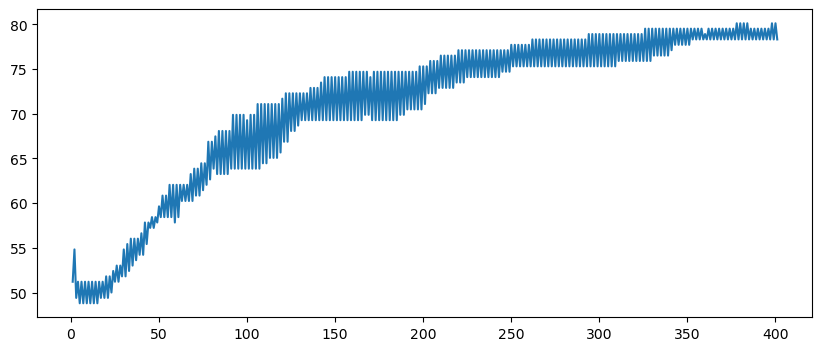

In [18]:
# Section A
Xtrain,Xtest,Ytrain,Ytest= _Myinit()
a = 0.01
T = 400
W_coff = calc_w_coff(Xtrain,Ytrain,a,T) # run the functions we implament above and print the results
P_arr1 = Classification_accuracy(Xtrain,Ytrain,W_coff,0.5)


Cross Entropy of Train while m=1 is: 757.730369746939

Cross Entropy of Train while m=2 is: 212.1970035202889

Cross Entropy of Train while m=3 is: 266.7198099388733

Cross Entropy of Train while m=4 is: 278.8815847732376

Cross Entropy of Train while m=5 is: 235.45112550608715

Cross Entropy of Train while m=6 is: 280.40104470107786

Cross Entropy of Train while m=7 is: 226.13044363048758

Cross Entropy of Train while m=8 is: 275.8379642155096

Cross Entropy of Train while m=9 is: 220.576299377776

Cross Entropy of Train while m=10 is: 269.972887296331

Cross Entropy of Train while m=11 is: 215.82038732559963

Cross Entropy of Train while m=12 is: 263.339012077589

Cross Entropy of Train while m=13 is: 211.45707625343715

Cross Entropy of Train while m=14 is: 256.191535693428

Cross Entropy of Train while m=15 is: 207.26734149471594

Cross Entropy of Train while m=16 is: 248.7345586185516

Cross Entropy of Train while m=17 is: 203.0985085290697

Cross Entropy of Train while m=18 is: 

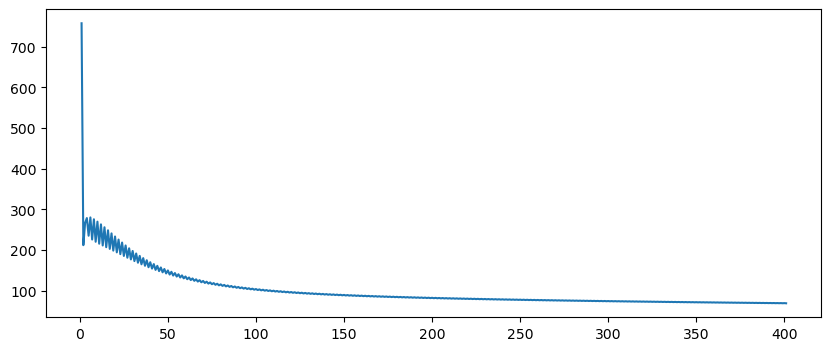

In [615]:
# Section B
crossEntropy=np.zeros(len(W_coff)) # use the W_coff we found above to check cross entropy plot for train
m = np.array(range(1,len(W_coff)+1)) 
for i in range(len(W_coff)):
    crossEntropy[i]= cross_entropy(Ytrain,P_arr1[i])
    print("\nCross Entropy of Train while m=" + str(m[i]) +" is: "+str(crossEntropy[i]))

fig = plt.figure(figsize=(10, 4))
plt.plot(m,crossEntropy)

# D_test


Accuracy of the classifier:


Accuracy in iteration #0 is: 61.904761904761905%

Accuracy in iteration #1 is: 61.904761904761905%

Accuracy in iteration #2 is: 38.095238095238095%

Accuracy in iteration #3 is: 61.904761904761905%

Accuracy in iteration #4 is: 38.095238095238095%

Accuracy in iteration #5 is: 61.904761904761905%

Accuracy in iteration #6 is: 38.095238095238095%

Accuracy in iteration #7 is: 61.904761904761905%

Accuracy in iteration #8 is: 38.095238095238095%

Accuracy in iteration #9 is: 61.904761904761905%

Accuracy in iteration #10 is: 38.095238095238095%

Accuracy in iteration #11 is: 61.904761904761905%

Accuracy in iteration #12 is: 38.095238095238095%

Accuracy in iteration #13 is: 61.904761904761905%

Accuracy in iteration #14 is: 38.095238095238095%

Accuracy in iteration #15 is: 61.904761904761905%

Accuracy in iteration #16 is: 38.095238095238095%

Accuracy in iteration #17 is: 61.904761904761905%

Accuracy in iteration #18 is: 40.476190476190474%

Accuracy i

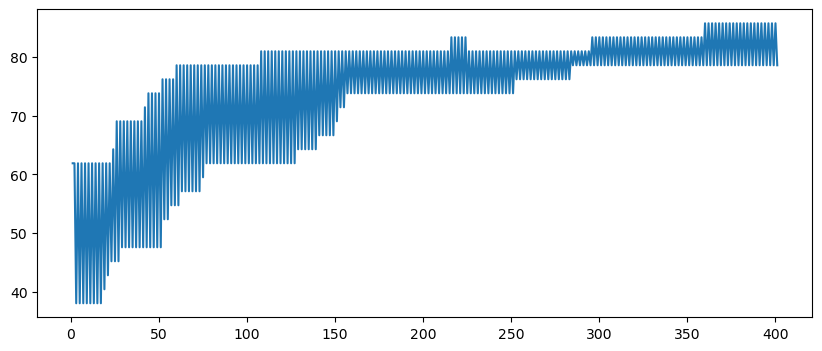

In [616]:
# Section B
P_arr2 = Classification_accuracy(Xtest,Ytest,W_coff,0.5) #use the W_coff we found above to check test accuracy and results


Cross Entropy of Test while m=1 is: 144.6705076010668

Cross Entropy of Test while m=2 is: 41.32274145337364

Cross Entropy of Test while m=3 is: 75.21440017162026

Cross Entropy of Test while m=4 is: 52.60882644333814

Cross Entropy of Test while m=5 is: 65.88531331968532

Cross Entropy of Test while m=6 is: 51.925395212685245

Cross Entropy of Test while m=7 is: 63.228806298942246

Cross Entropy of Test while m=8 is: 50.189506731801444

Cross Entropy of Test while m=9 is: 61.703874643283754

Cross Entropy of Test while m=10 is: 48.29313019001726

Cross Entropy of Test while m=11 is: 60.40744633951634

Cross Entropy of Test while m=12 is: 46.33702051620691

Cross Entropy of Test while m=13 is: 59.21796511163833

Cross Entropy of Test while m=14 is: 44.37166329191187

Cross Entropy of Test while m=15 is: 58.07028134858896

Cross Entropy of Test while m=16 is: 42.4380642296085

Cross Entropy of Test while m=17 is: 56.918905791058386

Cross Entropy of Test while m=18 is: 40.568101324570

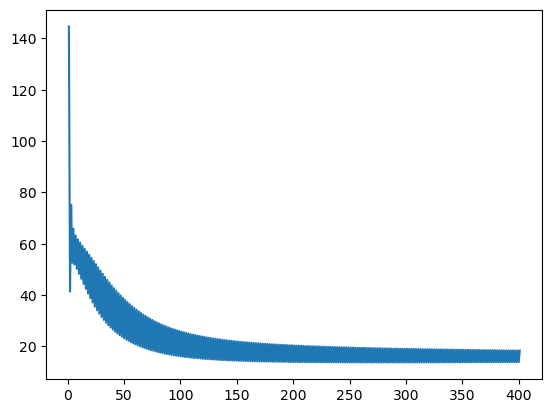

In [617]:
# Section B
crossEntropy=np.zeros(len(W_coff)) # use the W_coff we found above to check cross entropy plot for test
m = np.array(range(1,len(W_coff)+1))
for i in range(len(W_coff)):
    crossEntropy[i]= cross_entropy(Ytest,P_arr2[i])
    print("\nCross Entropy of Test while m=" + str(m[i]) +" is: "+str(crossEntropy[i]))
plt.plot(m,crossEntropy)

# ROC

In [35]:
def rocMatrix(P,Yreal,length):
    
    thValues=np.linspace(0.01,1,100) # give values for th between 0 to 1
    myMatrix=np.zeros((3,100)) # create matrix 3x100
    acc=np.zeros(100) #specific accuracy array for each value of y
    for i in range(100):
            Ypredicted=FinalClassification(P,thValues[i]) # find the y with the function we implament above
            CM=ConfusionMatrix(Yreal,Ypredicted) # find the confusion matrix between Ypred to Yreal
            acc[i]=accuracy(CM, length);
            myMatrix[0,i]=thValues[i] # implament to formula to create roc matrix
            myMatrix[1,i]=CM[0,0]/(CM[0,0]+CM[1,0])
            myMatrix[2,i]=CM[0,1]/(CM[0,1]+CM[1,1])
            
    print("max accuracy of roc matrix is " + str(acc.max())+"%")
    return myMatrix

Train:
Begin:
max accuracy of roc matrix is 51.204819277108435%
Middle:
max accuracy of roc matrix is 82.53012048192771%
End:
max accuracy of roc matrix is 85.54216867469879%


Text(0.5, 1.0, 'ROC curve of train')

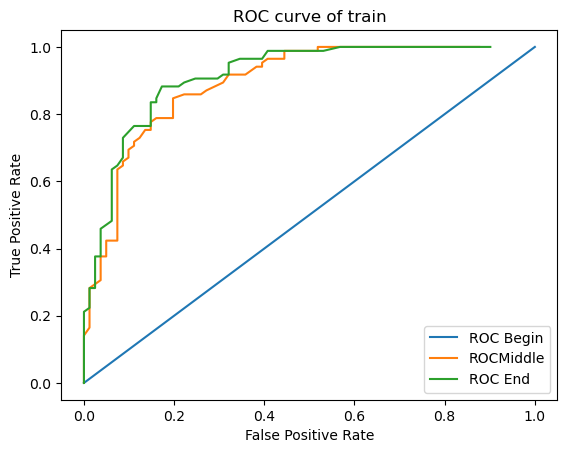

In [628]:
# Q10 - Section C
print("Train:")
print("Begin:")
roc_train_begin=rocMatrix(P_arr1[0],Ytrain,len(Xtrain)) # find the roc for the first w
print("Middle:")
mid=round(T/2)
roc_train_middle=rocMatrix(P_arr1[mid],Ytrain,len(Xtrain)) # find the roc for the middle w
print("End:")
roc_train_end=rocMatrix(P_arr1[T],Ytrain,len(Xtrain))# find the roc for the last w

index_vlues = ["th", "TPR", "FPR"]
df1 = pd.DataFrame(data = roc_train_begin, O = index_vlues) # plot every roc we found for begin, middle and end
df2 = pd.DataFrame(data = roc_train_middle, index = index_vlues)
df3 = pd.DataFrame(data = roc_train_end, index = index_vlues)
plt.plot(df1.loc["FPR"].values, df1.loc["TPR"].values)
plt.plot(df2.loc["FPR"].values, df2.loc["TPR"].values)
plt.plot(df3.loc["FPR"].values, df3.loc["TPR"].values)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(['ROC Begin', 'ROCMiddle','ROC End'])
plt.title('ROC curve of train')



Test:
max accuracy of roc matrix is 85.71428571428571%


Text(0.5, 1.0, 'ROC curve of Test')

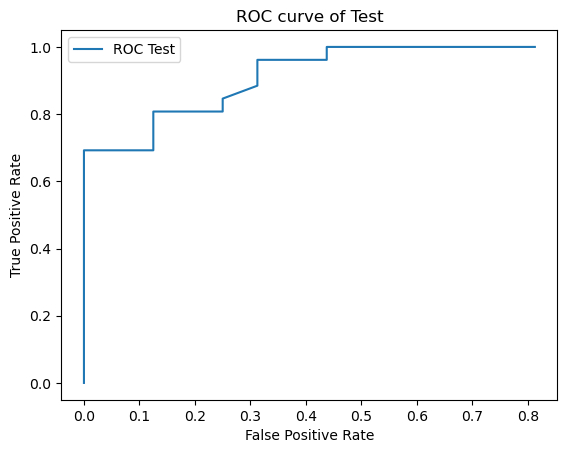

In [629]:
# Q10 - Section D

print("Test:")
roc_test=rocMatrix(P_arr2[T],Ytest,len(Xtest)) # find the roc for the last w
index_vlues = ["th", "TPR", "FPR"]
df1 = pd.DataFrame(data = roc_test, index = index_vlues) # plot the roc we found for the end of test
plt.plot(df1.loc["FPR"].values, df1.loc["TPR"].values)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(['ROC Test'])
plt.title('ROC curve of Test')

# Question 11

In [630]:
def Impact_Test (a,myType):
    #Running a test on the data to find the behavior and effect of the variables
    #myType=0 mean train, myType=1 mean test
    Xtrain,Xtest,Ytrain,Ytest= _Myinit() #read data from file and split to series
    T=[1,10,100,400,800] #array of differents 'T' values
    if (myType==0): #if we cheak train type
        for t in T:
            print("\n\033[1;34mIn this stage , a= "+str(a)+" , T= "+str(t)+"\033[0m")
            W_coff = calc_w_coff(Xtrain,Ytrain,a,t)
            P_arr = Classification_accuracy(Xtrain,Ytrain,W_coff,0.5)
            print("\n\033[1;33mThe first value of W[0] in this stage: \n" +str(W_coff[0])+"\033[0m")
            print("\n\033[1;32mThe final value of W in this stage: \n" +str(W_coff[len(W_coff)-1])+"\033[0m")
    else:
        for t in T:
            print("\n\033[1;34mIn this stage , a= "+str(a)+" , T= "+str(t)+"\033[0m")
            W_coff = calc_w_coff(Xtrain,Ytrain,a,t)
            P_arr = Classification_accuracy(Xtest,Ytest,W_coff,0.5)
            print("\n\033[1;33mThe first value of W[0] in this stage: \n" +str(W_coff[0])+"\033[0m")
            print("\n\033[1;32mThe final value of W in this stage: \n" +str(W_coff[len(W_coff)-1])+"\033[0m")


In [19]:
# #Running a test on the data, at each step a different 'a' value is sent to the Impact_Test function
# #check train
# a=[0.01,0.05,0.1,0.3,0.5,1] #array of differents 'a' values
# for i in range(len(a)):
#     Impact_Test(a[i],0)


In [20]:
# # #check test
# #the same as above
# a=[0.01,0.05,0.1,0.3,0.5,1]
# for i in range(len(a)):
#     Impact_Test(a[i],1)

# Question 12

In [41]:
def Normalization(): #normalized all the data and return its separated
    Xtrain,Xtest,Ytrain,Ytest= _Myinit() #read data from file and split to series
    
    #normalizes the information
    avrages=np.mean(Xtrain,axis=0) #get the mean of each column
    Xtrain=Xtrain-avrages #remove the mean from X
    variances = np.var(Xtrain, axis=0) #get the variance of each column
    Xtrain = Xtrain / np.sqrt(variances) #remove the variance from X

    #same calc for the test
    avrages=np.mean(Xtest,axis=0)
    Xtest=Xtest-avrages
    variances = np.var(Xtest, axis=0)
    Xtest = Xtest / np.sqrt(variances)
    
    return Xtrain,Xtest,Ytrain,Ytest

In [42]:
def calc_w_coff_Normalized(x,y,a,T):
#same explanation and operation as this function above, but now starting with zeros at W[0]
    
    W = np.zeros(len(x[0])+1) #starting with zeros at W[0]
    x=np.insert(x, 0, 1, axis=1) 

    mylen=T+1
    W_coff=np.zeros((mylen,len(W)))
    W_coff[0]=W
    for t in range(T):
        W=gradientStep(W,a,x,y)
        W_coff[t+1]=W

    x=x[:, 1:]
    return W_coff

In [43]:
#Check KNN
#same explanation and operation as this part above, but now with normalization init

#init the normalization function and get the starting normalized elemets
Xtrain,Xtest,Ytrain,Ytest=Normalization()



Ypredicted=KNN(Xtrain, Ytrain, Xtest, 3)
CM=ConfusionMatrix(Ytest,Ypredicted)
acc=accuracy(CM, len(Ytest));
print("Accuracy of Test: "+str(round(acc,2)) + "%")


Accuracy of Test: 90.48%


In [29]:
#question 8
#same explanation and operation as this part above

temp=0
index=0
for i in range(1,len(Ytest),2):
    Ypredicted=KNN(Xtrain, Ytrain, Xtest, i)
    CM=ConfusionMatrix(Ytest,Ypredicted)
    acc=accuracy(CM, len(Ytest));
    if (acc>=temp):
        temp=acc
        index=i
    print("k= "+str(i) +" ,accuracy: "+str(acc))

print("with k= "+str(index)+" we get the best accuracy of "+str(temp)+ "%")

k= 1 ,accuracy: 88.09523809523809
k= 3 ,accuracy: 90.47619047619048
k= 5 ,accuracy: 85.71428571428571
k= 7 ,accuracy: 85.71428571428571
k= 9 ,accuracy: 88.09523809523809
k= 11 ,accuracy: 83.33333333333334
k= 13 ,accuracy: 80.95238095238095
k= 15 ,accuracy: 78.57142857142857
k= 17 ,accuracy: 80.95238095238095
k= 19 ,accuracy: 78.57142857142857
k= 21 ,accuracy: 80.95238095238095
k= 23 ,accuracy: 83.33333333333334
k= 25 ,accuracy: 80.95238095238095
k= 27 ,accuracy: 80.95238095238095
k= 29 ,accuracy: 80.95238095238095
k= 31 ,accuracy: 80.95238095238095
k= 33 ,accuracy: 78.57142857142857
k= 35 ,accuracy: 78.57142857142857
k= 37 ,accuracy: 78.57142857142857
k= 39 ,accuracy: 78.57142857142857
k= 41 ,accuracy: 78.57142857142857
with k= 3 we get the best accuracy of 90.47619047619048%



Train:

Accuracy of the classifier:


Accuracy in iteration #0 is: 48.795180722891565%

Accuracy in iteration #1 is: 72.28915662650603%

Accuracy in iteration #2 is: 75.90361445783132%

Accuracy in iteration #3 is: 77.71084337349397%

Accuracy in iteration #4 is: 79.51807228915662%

Accuracy in iteration #5 is: 79.51807228915662%

Accuracy in iteration #6 is: 80.72289156626506%

Accuracy in iteration #7 is: 80.12048192771084%

Accuracy in iteration #8 is: 80.12048192771084%

Accuracy in iteration #9 is: 80.72289156626506%

Accuracy in iteration #10 is: 81.32530120481928%

Accuracy in iteration #11 is: 81.92771084337349%

Accuracy in iteration #12 is: 81.92771084337349%

Accuracy in iteration #13 is: 81.92771084337349%

Accuracy in iteration #14 is: 81.92771084337349%

Accuracy in iteration #15 is: 81.92771084337349%

Accuracy in iteration #16 is: 81.92771084337349%

Accuracy in iteration #17 is: 81.92771084337349%

Accuracy in iteration #18 is: 81.92771084337349%

Accuracy in iteratio

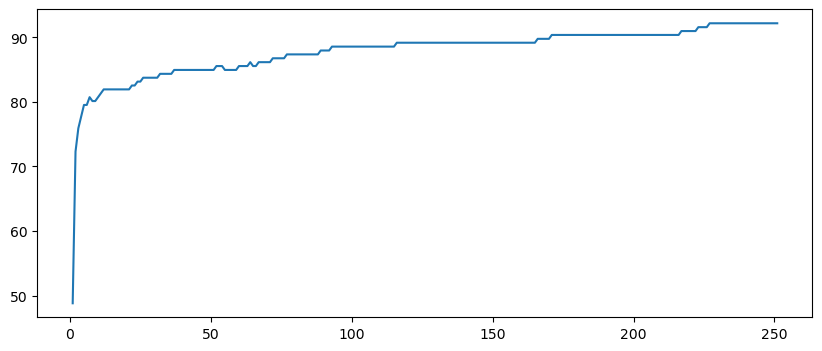

In [30]:
Xtrain,Xtest,Ytrain,Ytest=Normalization() #init the normalization function and get the starting normalized elemets

#at this part, we choose better a and number of iteration T after normalization
a=0.001
T=250

#runs the function to calculate the W vector
W_coff = calc_w_coff_Normalized(Xtrain,Ytrain,a,T)

#calculates the percentage of accuracy for each iteration for test
print("\nTrain:")
P_arr1 = Classification_accuracy(Xtrain,Ytrain,W_coff,0.5)



Test:

Accuracy of the classifier:


Accuracy in iteration #0 is: 38.095238095238095%

Accuracy in iteration #1 is: 76.19047619047619%

Accuracy in iteration #2 is: 73.80952380952381%

Accuracy in iteration #3 is: 76.19047619047619%

Accuracy in iteration #4 is: 78.57142857142857%

Accuracy in iteration #5 is: 78.57142857142857%

Accuracy in iteration #6 is: 78.57142857142857%

Accuracy in iteration #7 is: 80.95238095238095%

Accuracy in iteration #8 is: 80.95238095238095%

Accuracy in iteration #9 is: 80.95238095238095%

Accuracy in iteration #10 is: 80.95238095238095%

Accuracy in iteration #11 is: 80.95238095238095%

Accuracy in iteration #12 is: 80.95238095238095%

Accuracy in iteration #13 is: 80.95238095238095%

Accuracy in iteration #14 is: 80.95238095238095%

Accuracy in iteration #15 is: 80.95238095238095%

Accuracy in iteration #16 is: 80.95238095238095%

Accuracy in iteration #17 is: 80.95238095238095%

Accuracy in iteration #18 is: 80.95238095238095%

Accuracy in iteratio

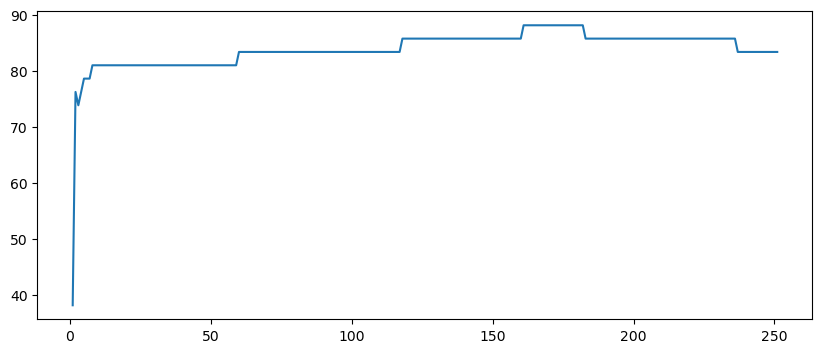

In [31]:
#calculates the percentage of accuracy for each iteration for test
print("\n\nTest:")
P_arr2 = Classification_accuracy(Xtest,Ytest,W_coff,0.5) #runs the classification_accuracy function


Cross Entropy of Train while m=1 is: 115.0624319729511

Cross Entropy of Train while m=2 is: 102.13454511821507

Cross Entropy of Train while m=3 is: 94.86537431982869

Cross Entropy of Train while m=4 is: 89.96121901441012

Cross Entropy of Train while m=5 is: 86.31302598401648

Cross Entropy of Train while m=6 is: 83.4420546824922

Cross Entropy of Train while m=7 is: 81.09693982621198

Cross Entropy of Train while m=8 is: 79.12847914315807

Cross Entropy of Train while m=9 is: 77.44096828314373

Cross Entropy of Train while m=10 is: 75.96968194592968

Cross Entropy of Train while m=11 is: 74.66908723997574

Cross Entropy of Train while m=12 is: 73.50612984385202

Cross Entropy of Train while m=13 is: 72.45617554661979

Cross Entropy of Train while m=14 is: 71.50044643542654

Cross Entropy of Train while m=15 is: 70.6243440832193

Cross Entropy of Train while m=16 is: 69.81632082333164

Cross Entropy of Train while m=17 is: 69.06710087292058

Cross Entropy of Train while m=18 is: 68

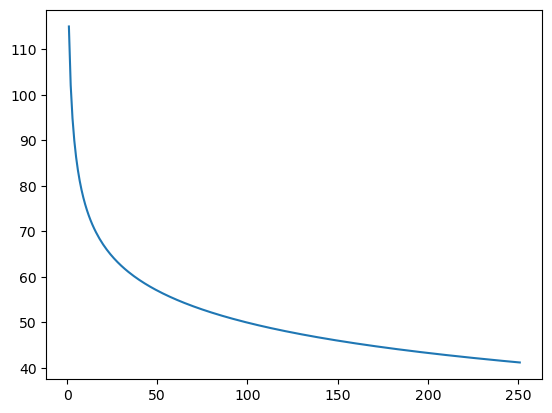

In [32]:
# Cross Entropy of Train
#same explanation and operation as this part above
crossEntropy=np.zeros(len(W_coff))
m = np.array(range(1,len(W_coff)+1)) 
for i in range(len(W_coff)):
    crossEntropy[i]= cross_entropy(Ytrain,P_arr1[i])
    print("\nCross Entropy of Train while m=" + str(m[i]) +" is: "+str(crossEntropy[i]))
plt.plot(m,crossEntropy)


Cross Entropy of Test while m=1 is: 29.11218158351767

Cross Entropy of Test while m=2 is: 25.04542836837632

Cross Entropy of Test while m=3 is: 22.924219205910692

Cross Entropy of Test while m=4 is: 21.645651266645633

Cross Entropy of Test while m=5 is: 20.79705148677861

Cross Entropy of Test while m=6 is: 20.195698700465183

Cross Entropy of Test while m=7 is: 19.74855088166321

Cross Entropy of Test while m=8 is: 19.403430415900587

Cross Entropy of Test while m=9 is: 19.128985633536082

Cross Entropy of Test while m=10 is: 18.90536327864023

Cross Entropy of Test while m=11 is: 18.71944964689554

Cross Entropy of Test while m=12 is: 18.562271431820783

Cross Entropy of Test while m=13 is: 18.42749941528468

Cross Entropy of Test while m=14 is: 18.310549649570728

Cross Entropy of Test while m=15 is: 18.20802391906588

Cross Entropy of Test while m=16 is: 18.117350474542317

Cross Entropy of Test while m=17 is: 18.036546962979894

Cross Entropy of Test while m=18 is: 17.9640601

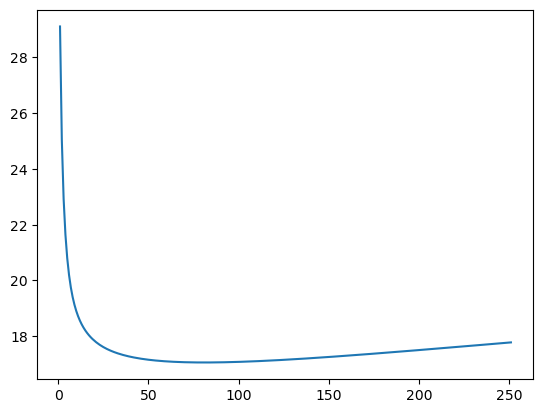

In [33]:
# Cross Entropy of Test
#same explanation and operation as this part above
crossEntropy=np.zeros(len(W_coff))
m = np.array(range(1,len(W_coff)+1)) 
for i in range(len(W_coff)):
    crossEntropy[i]= cross_entropy(Ytest,P_arr2[i])
    print("\nCross Entropy of Test while m=" + str(m[i]) +" is: "+str(crossEntropy[i]))
plt.plot(m,crossEntropy)

Train:
Begin:
max accuracy of roc matrix is 51.204819277108435%
Middle:
max accuracy of roc matrix is 90.96385542168674%
End:
max accuracy of roc matrix is 92.16867469879519%


Text(0.5, 1.0, 'ROC curve of train')

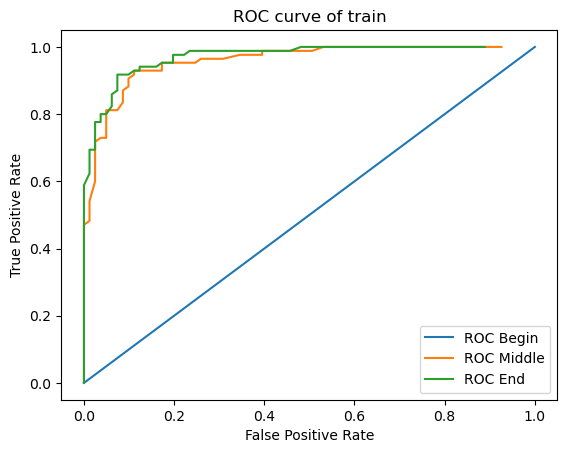

In [36]:
# Q10 - Section C - ROC Train
#same explanation and operation as this part above
print("Train:")
print("Begin:")
roc_train_begin=rocMatrix(P_arr1[0],Ytrain,len(Xtrain))
print("Middle:")
mid=round(T/2)
roc_train_middle=rocMatrix(P_arr1[mid],Ytrain,len(Xtrain))
print("End:")
roc_train_end=rocMatrix(P_arr1[T],Ytrain,len(Xtrain))

index_vlues = ["th", "TPR", "FPR"]
df1 = pd.DataFrame(data = roc_train_begin, index = index_vlues)
df2 = pd.DataFrame(data = roc_train_middle, index = index_vlues)
df3 = pd.DataFrame(data = roc_train_end, index = index_vlues)
plt.plot(df1.loc["FPR"].values, df1.loc["TPR"].values)
plt.plot(df2.loc["FPR"].values, df2.loc["TPR"].values)
plt.plot(df3.loc["FPR"].values, df3.loc["TPR"].values)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(['ROC Begin', 'ROC Middle','ROC End'])
plt.title('ROC curve of train')

Test:
max accuracy of roc matrix is 85.71428571428571%


Text(0.5, 1.0, 'ROC curve of Test at the end')

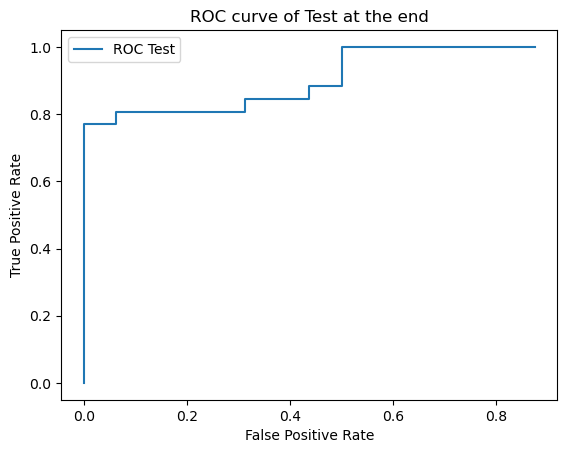

In [37]:
# Q10 - Section D - ROC Test 
#same explanation and operation as this part above
print("Test:")
roc_test=rocMatrix(P_arr2[T],Ytest,len(Xtest))
index_vlues = ["th", "TPR", "FPR"]
df1 = pd.DataFrame(data = roc_test, index = index_vlues)
plt.plot(df1.loc["FPR"].values, df1.loc["TPR"].values)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(['ROC Test'])
plt.title('ROC curve of Test at the end')